In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 15.4 MB/s eta 0:00:00


In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!pytorch --version


/bin/bash: line 1: pytorch: command not found


In [ ]:
# Install the required packages for YOLO11 and Comet ML
!pip install ultralytics comet_ml torch torchvision

In [ ]:
!pip show coment_ml


In [ ]:
# Set your Comet Api Key
!export COMET_API_KEY=yXlWWyyCIWIDRmLjpEWU871FF

In [ ]:
import comet_ml

comet_ml.login(project_name="BrainSafe")

In [ ]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

In [ ]:
%cd content/

/content


In [ ]:
os.makedirs('datasets', exist_ok=True)

In [ ]:
import zipfile
import os

def unzip(zip_file=None, extract_to="./extracted"):
    try:
        # Create the target folder if it does not exist
        if not os.path.exists(extract_to):
            os.makedirs(extract_to)

        # Extract all files to the specified folder
        with zipfile.ZipFile(zip_file, 'r') as z:
            z.extractall(extract_to)
            print(f"Extracted all to {extract_to}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Call the function, passing the zip file path and folder to extract into
unzip('/content/drive/MyDrive/BrainSafe/Train/Anotated_Data_Both_Zip.zip', '../content')


Extracted all to ../content


In [ ]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [ ]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [ ]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))

    all_images.sort()

    num_images = len(all_images)

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

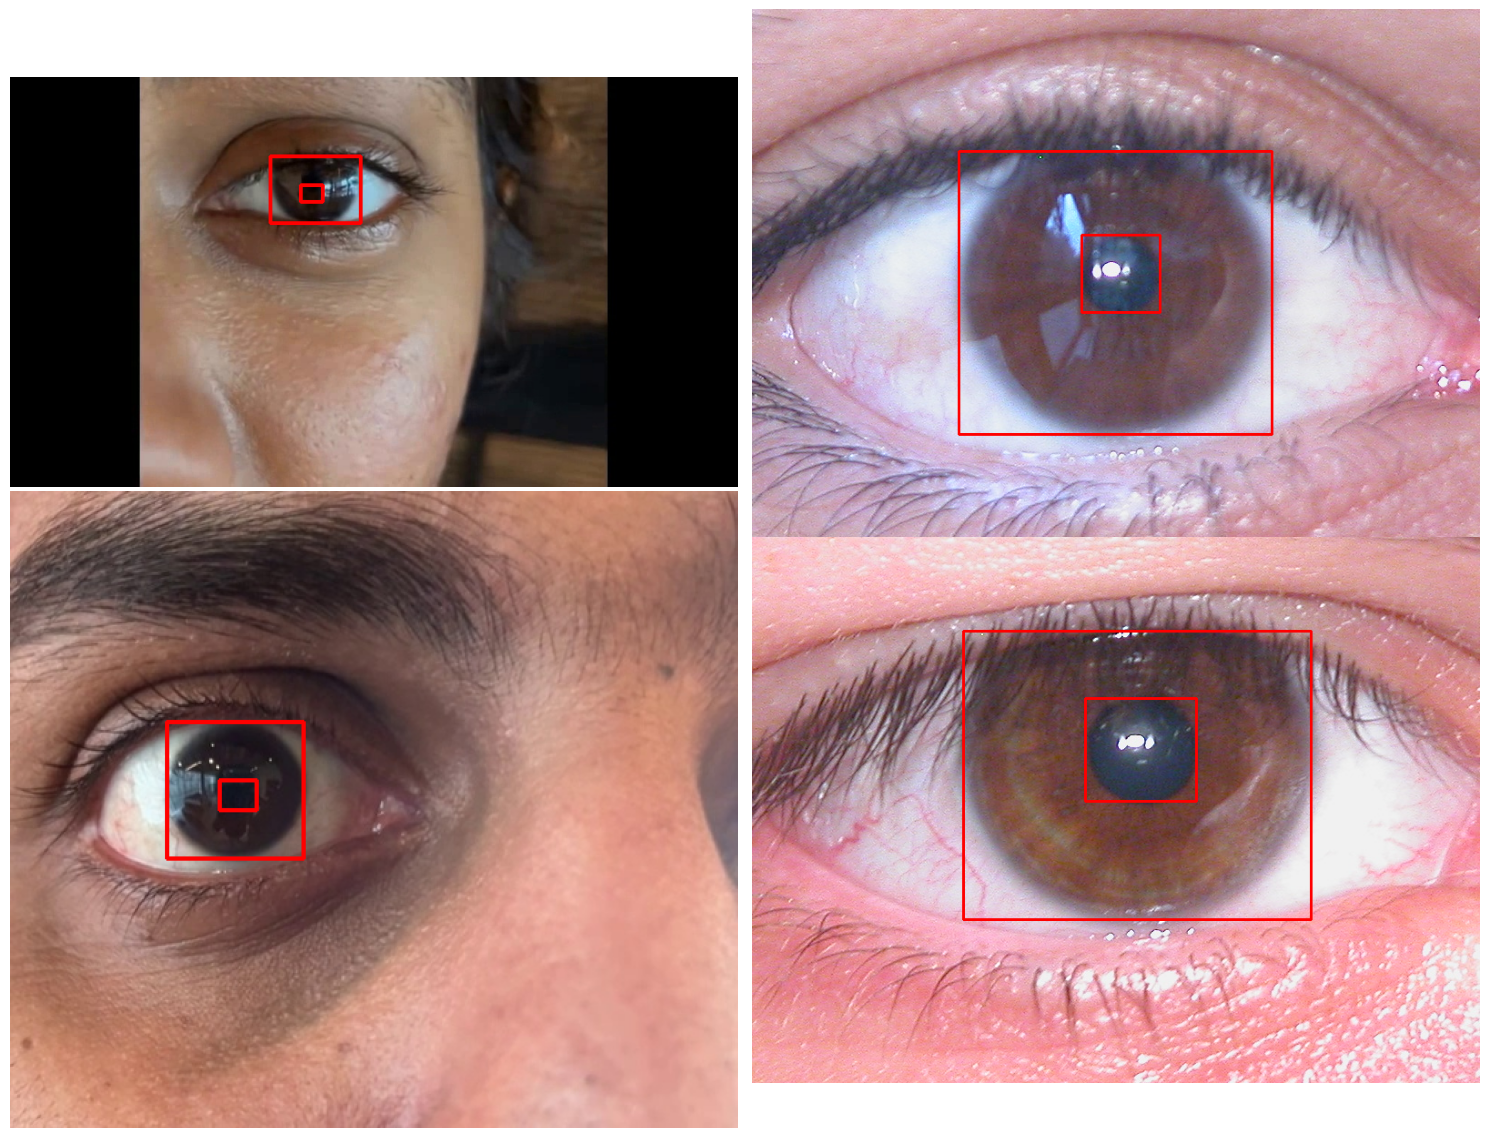

In [ ]:
# Visualize a few training images.
plot(
    image_paths='/content/Anotated_Data_Both/train/images',
    label_paths='/content/Anotated_Data_Both/train/labels',
    num_samples=4,
)

In [ ]:
%cd content/


/content


In [ ]:
!pip install sympy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.0+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [ ]:
import os
import torch

del model
torch.cuda.empty_cache()


In [ ]:
!nvidia-smi

Thu Oct 24 05:57:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              26W /  70W |    241MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import gc
model.cpu()
del model
gc.collect()
torch.cuda.empty_cache()

In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov9e.pt")  # load a pretrained model (recommended for training)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 112M/112M [00:03<00:00, 37.8MB/s]


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov10x.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 61.4M/61.4M [00:01<00:00, 47.1MB/s]


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov10x.pt")

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov9e.pt")  # load a pretrained model (recommended for training)

# torch.cuda.empty_cache()

# Train the model
results = model.train(
    data="/content/Anotated_Data_Both/data.yaml",
    epochs=50,
    imgsz=928,
    batch=8,
    project="BrainSafe",
    save_period=1,
    save_json=True,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:00<00:00, 377MB/s]


Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Anotated_Data_Both/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=928, save=True, save_period=1, cache=False, device=None, workers=8, project=BrainSafe, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/silunikeerthiratne/brainsafe/8c9646cdcfdf4f6d91903a8ffdbff561

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


TensorBoard: Start with 'tensorboard --logdir BrainSafe/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 113MB/s]


AMP: checks passed ✅


train: Scanning /content/Anotated_Data_Both/train/labels... 2288 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2288/2288 [00:01<00:00, 1545.53it/s]


train: New cache created: /content/Anotated_Data_Both/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/Anotated_Data_Both/val/labels... 232 images, 0 backgrounds, 0 corrupt: 100%|██████████| 232/232 [00:00<00:00, 624.32it/s]

val: New cache created: /content/Anotated_Data_Both/val/labels.cache


Plotting labels to BrainSafe/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 928 train, 928 val
Using 2 dataloader workers
Logging results to BrainSafe/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.9G     0.6668     0.7831      1.084         24        928: 100%|██████████| 286/286 [06:18<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:12<00:00,  1.22it/s]

                   all        232        463      0.953      0.976      0.984      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      13.8G     0.6663     0.5581       1.06         28        928: 100%|██████████| 286/286 [06:16<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all        232        463      0.977      0.984      0.993      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      13.9G     0.6265      0.463      1.032         27        928: 100%|██████████| 286/286 [06:13<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]

                   all        232        463      0.993      0.926      0.969      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      13.9G     0.6046     0.4387      1.023         24        928: 100%|██████████| 286/286 [06:13<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all        232        463      0.996          1      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        14G     0.5716      0.399     0.9989         27        928: 100%|██████████| 286/286 [06:13<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]

                   all        232        463      0.997          1      0.993      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        14G     0.5643     0.3891     0.9943         23        928: 100%|██████████| 286/286 [06:13<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]

                   all        232        463      0.993      0.998      0.993      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      13.9G     0.5501     0.3673     0.9842         20        928: 100%|██████████| 286/286 [06:13<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all        232        463      0.997      0.998      0.993      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      13.9G     0.5433      0.354     0.9759         36        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all        232        463      0.995      0.998      0.994      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.9G      0.524     0.3411     0.9668         35        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all        232        463      0.997          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      13.9G     0.5258     0.3376     0.9736         37        928: 100%|██████████| 286/286 [06:13<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all        232        463      0.997          1      0.993      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        14G     0.5108     0.3289     0.9628         30        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all        232        463      0.993          1      0.993      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.9G     0.5038     0.3204     0.9587         44        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all        232        463      0.995          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      13.9G     0.4979       0.31      0.954         30        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]

                   all        232        463      0.995          1      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.9G     0.4925     0.2993     0.9544         17        928: 100%|██████████| 286/286 [06:11<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all        232        463      0.997          1      0.993      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.9G     0.4851      0.297     0.9393         25        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all        232        463      0.993      0.998      0.992      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      13.9G     0.4846     0.2962     0.9423         45        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all        232        463      0.997          1      0.993      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      13.9G     0.4771     0.2945     0.9378         30        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all        232        463      0.997          1      0.993       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50        14G     0.4771     0.2878     0.9434         30        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all        232        463      0.996          1      0.993       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      13.9G     0.4664     0.2809     0.9361         34        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]

                   all        232        463      0.997          1      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.9G     0.4691     0.2853     0.9367         27        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]

                   all        232        463      0.995          1      0.993       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        14G     0.4644     0.2819     0.9325         35        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all        232        463      0.997          1      0.994      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      13.9G      0.456     0.2743     0.9281         25        928: 100%|██████████| 286/286 [06:11<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]

                   all        232        463      0.997          1      0.993       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        14G     0.4539     0.2681     0.9241         38        928: 100%|██████████| 286/286 [06:11<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]

                   all        232        463      0.997          1      0.994      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        14G     0.4555     0.2662     0.9234         25        928: 100%|██████████| 286/286 [06:11<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.41it/s]

                   all        232        463      0.997          1      0.993      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        14G     0.4448     0.2637     0.9167         29        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all        232        463      0.997          1      0.994      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      13.9G     0.4425     0.2624     0.9166         32        928: 100%|██████████| 286/286 [06:11<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]

                   all        232        463      0.997          1      0.994      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.9G     0.4443     0.2622      0.926         19        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all        232        463      0.995          1      0.992      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      13.9G     0.4353     0.2496     0.9163         40        928: 100%|██████████| 286/286 [06:11<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.40it/s]

                   all        232        463      0.995          1      0.993      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      13.9G     0.4351     0.2513     0.9228         36        928: 100%|██████████| 286/286 [06:12<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]

                   all        232        463      0.996          1      0.994      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      13.9G     0.4336     0.2466     0.9139         27        928: 100%|██████████| 286/286 [06:11<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.37it/s]

                   all        232        463      0.997          1      0.993      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.9G     0.4258     0.2415     0.9082         33        928: 100%|██████████| 286/286 [06:11<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all        232        463      0.997          1      0.993      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      13.9G     0.4135     0.2507     0.9172         26        928:  11%|█         | 32/286 [00:41<05:33,  1.31s/it]

In [ ]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/datasets/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:34<00:00,  4.32s/it]


                   all        123       2877      0.802      0.245       0.26      0.158
                  ball         84         84          1          0          0          0
           goal keeper         88         94          1          0     0.0274     0.0153
                player        123       2425      0.743      0.934      0.881      0.536
                refree        123        274      0.464     0.0438       0.13     0.0788
Speed: 3.0ms preprocess, 252.6ms inference, 0.0ms loss, 12.6ms postprocess per image
Results saved to runs/detect/train162


array([          0,    0.015266,     0.53623,    0.078794])